# Wine Time
By:  Data Scientist Corey Baughman & DeAdrien Hill

## Goal:
* Discover drivers of wine quality scores in the wine quality dataset
* Identify if clustering has a benefit in modeling
* Use drivers to develop a machine learning model that predicts wine quality better than baseline

# Imports

In [1]:
#Modules for data processing
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import acquire
import prepare
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# Acquire

* Data acquired from Data.World Wine Quality Dataset
* Dataset contained 6497 rows and 12 columns before cleaning
* The colomn is_red was added to verify wine types
* Each row represents a red or white wine
* Each column represents a feature of the wine

# Prepare

* Dataset was clean with no missing values 
* Removed white space in column names
* Checked for and removed outliers
* Split the data for modeling

# Data Dictionary

### Feature                           Discription

**fixed acidity**:           most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**volatile acidity**:        the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste',


**citric acid**:             found in small quantities, citric acid can add freshness and flavor to wines

**residual sugar**:          the amount of sugar remaining after fermentation stops its rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**chlorides**:               the amount of salt in the wine','the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**free sulfur dioxide**:     amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
    
**total sulfur dioxide**:    the density of water is close to that of water depending on the percent alcohol and sugar content

**density**:                 describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**pH**:                      describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**sulphates**:               a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

**alcohol**:                 the percent alcohol content of the wine','(score between 0 and 10)

**quality**:                 score between 0 and 10
    
**is_red**:                  indicated red or white with 1 or 0

In [2]:
df = acquire.new_wine_data()

In [3]:
#Removed duplicated index from import
df.index.is_unique
df.index.duplicated()
df = df.loc[~df.index.duplicated(), :]

# Data Summary

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,7.280063,0.359076,0.303949,5.246121,0.059166,29.098612,106.603716,0.994797,3.222366,0.545572,10.559234,5.799918,0.326460
std,1.400082,0.175912,0.144303,4.661065,0.037585,17.932544,57.104232,0.003088,0.161953,0.155464,1.206790,0.851181,0.468966
min,3.800000,0.085000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.900000,0.039000,15.000000,60.000000,0.992340,3.110000,0.440000,9.500000,5.000000,0.000000
50%,7.000000,0.310000,0.300000,2.800000,0.050000,27.000000,110.000000,0.995200,3.210000,0.520000,10.400000,6.000000,0.000000
75%,7.800000,0.440000,0.370000,7.800000,0.073000,40.000000,147.000000,0.997050,3.320000,0.620000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.230000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


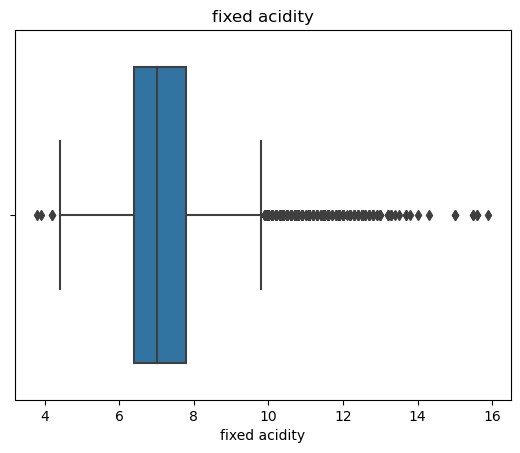

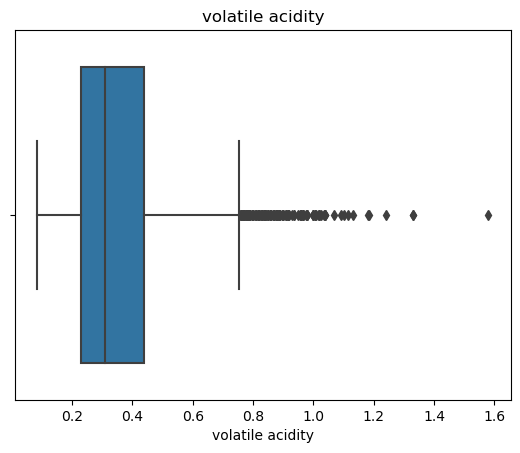

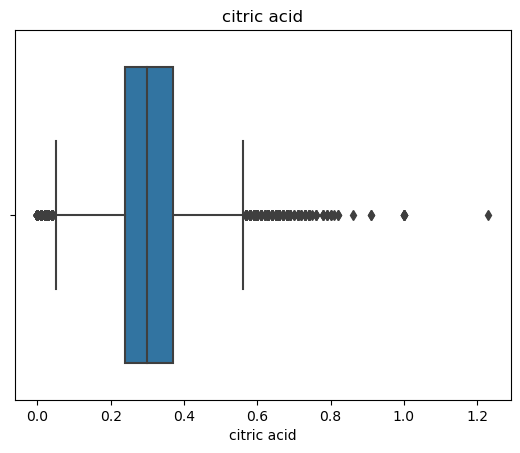

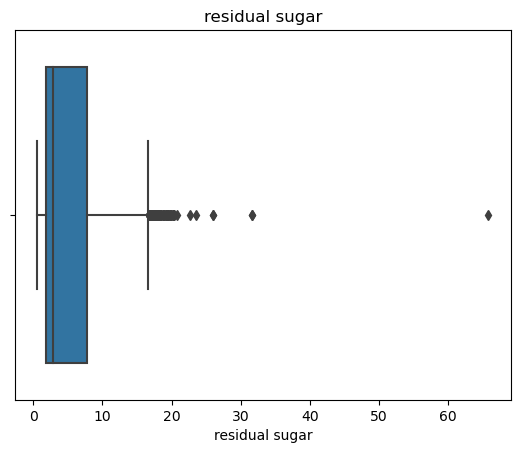

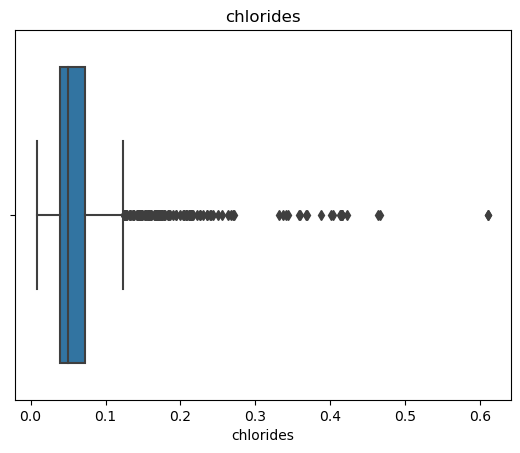

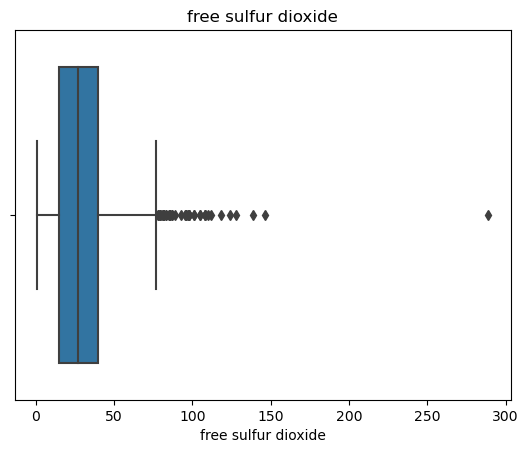

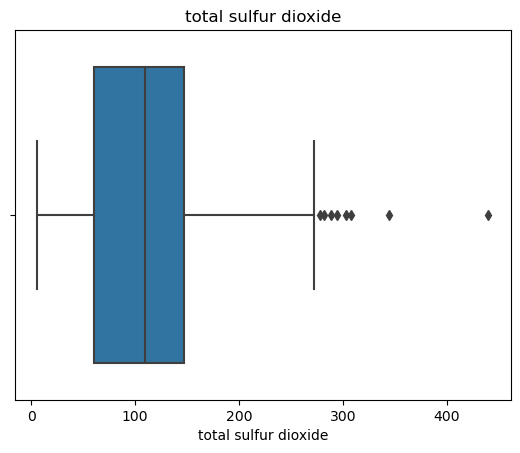

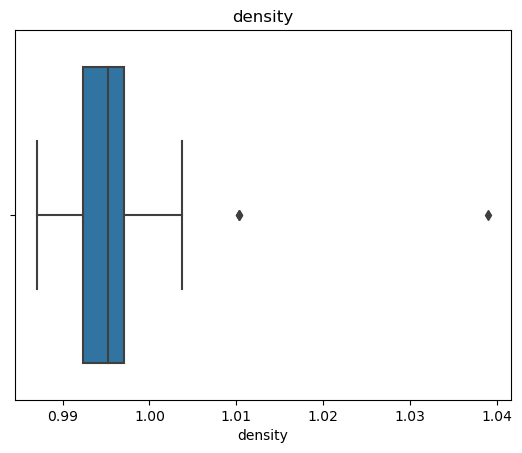

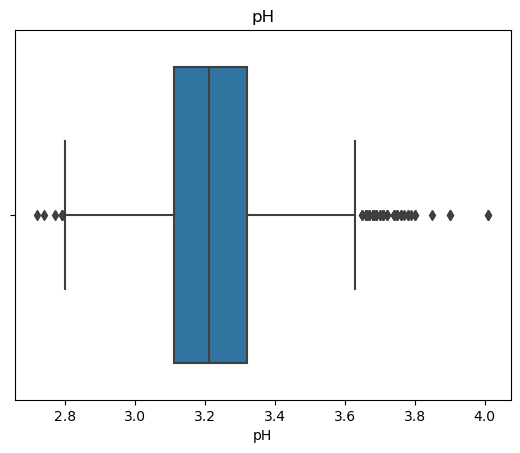

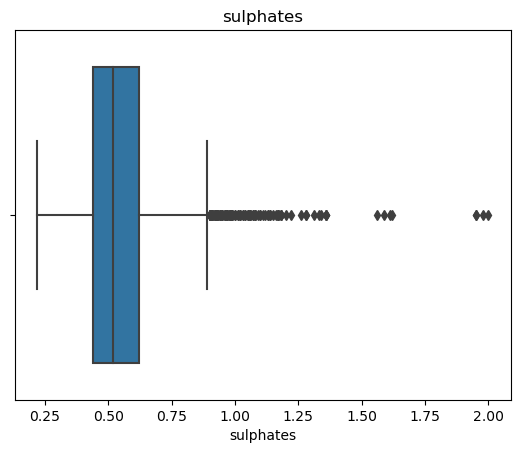

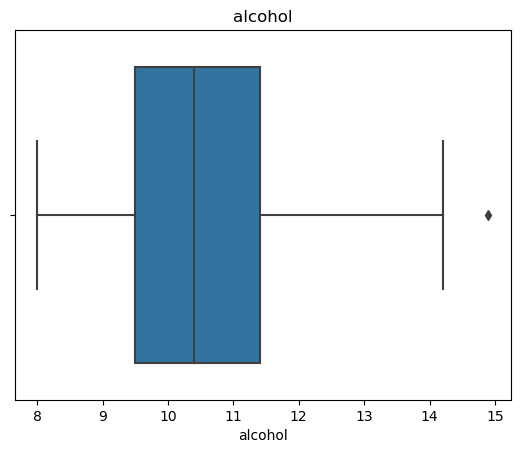

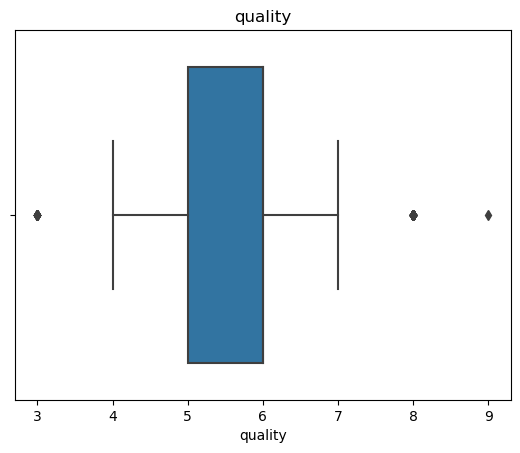

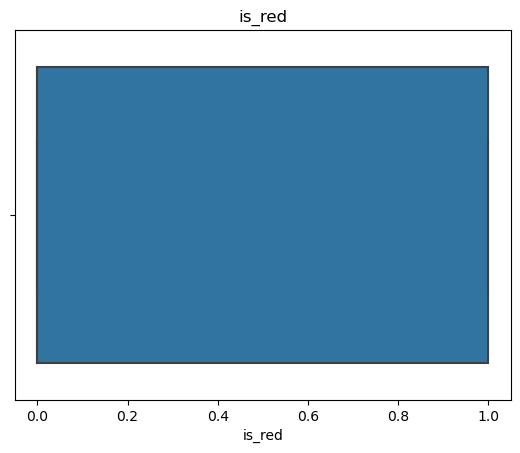

In [5]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [6]:
#Removing whitespace, outliers, and splitting the data
partitions = prepare.prepare(df, target_var='quality')

In [7]:
#Labeling variables for modeling
train = partitions[0]
X_train = partitions[1]
X_validate = partitions[2]
X_test = partitions[3]
y_train = partitions[4]
y_validate = partitions[5]
y_test = partitions[6]

# A look at the data

In [8]:
train.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,is_red
3270,6.4,0.15,0.29,1.8,0.044,21.0,115.0,0.99166,3.10,0.38,10.200000,5,0
3224,5.7,0.15,0.28,3.7,0.045,57.0,151.0,0.99130,3.22,0.27,11.200000,6,0
3213,7.5,0.18,0.45,4.6,0.041,67.0,158.0,0.99270,3.01,0.38,10.600000,6,0
4125,6.3,0.17,0.23,5.7,0.048,44.0,147.0,0.99382,3.08,0.54,10.000000,5,0
4655,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7,0


# Exploration

# What is the distribution of our data?

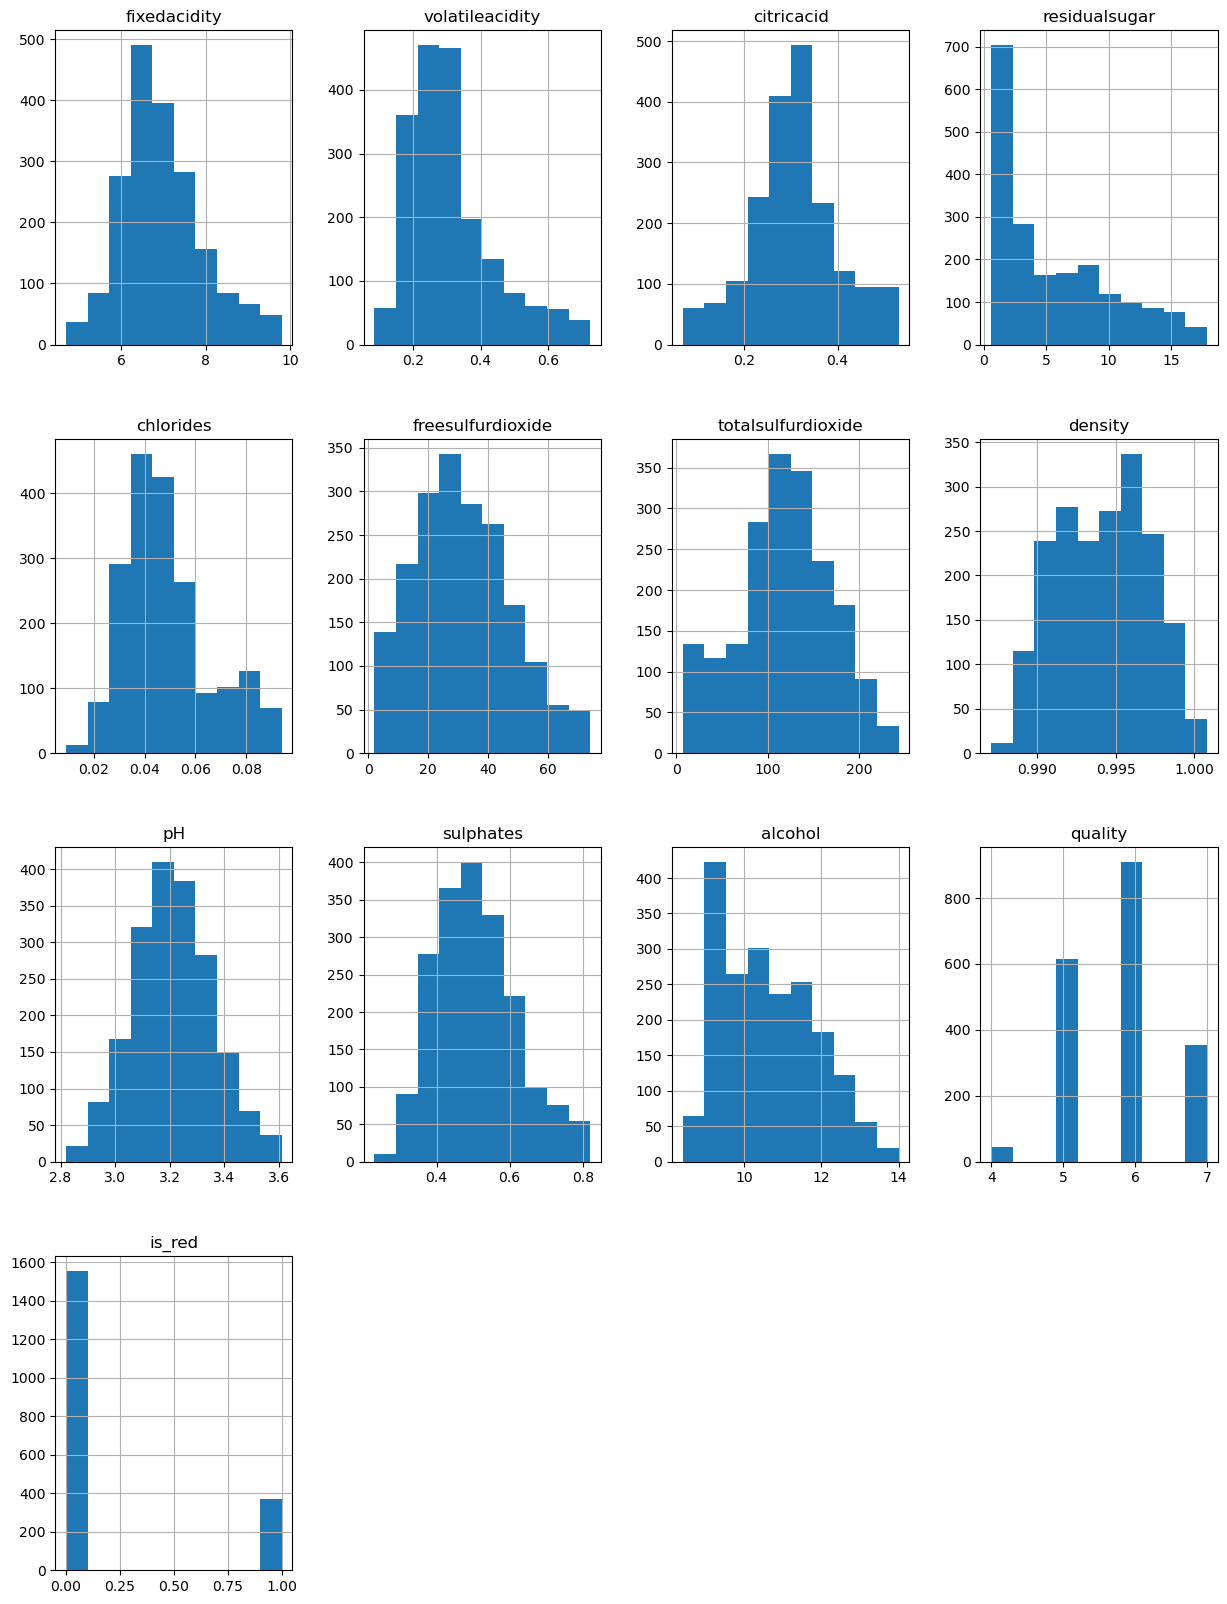

In [9]:
#Hist plot to show distribution of each column in the dataframe
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train.hist(ax = ax)
plt.show()

# Do certain drivers affect quality more than others?

In [10]:
#Correlation between feature and columns
prepare.pearson_r(train)

Feature-Target Correlations
{'fixedacidity_quality': -0.1197046778640205, 'volatileacidity_quality': -0.23866720945574935, 'citricacid_quality': 0.08118771974555672, 'residualsugar_quality': -0.0073253151676914265, 'chlorides_quality': -0.2598441710445752, 'freesulfurdioxide_quality': 0.06551222999925611, 'totalsulfurdioxide_quality': -0.10330531731860697, 'density_quality': -0.3083609249549069, 'pH_quality': -0.00028333115769155236, 'sulphates_quality': 0.014618625972843543, 'alcohol_quality': 0.4369958740462614, 'is_red_quality': -0.11900539994309878}


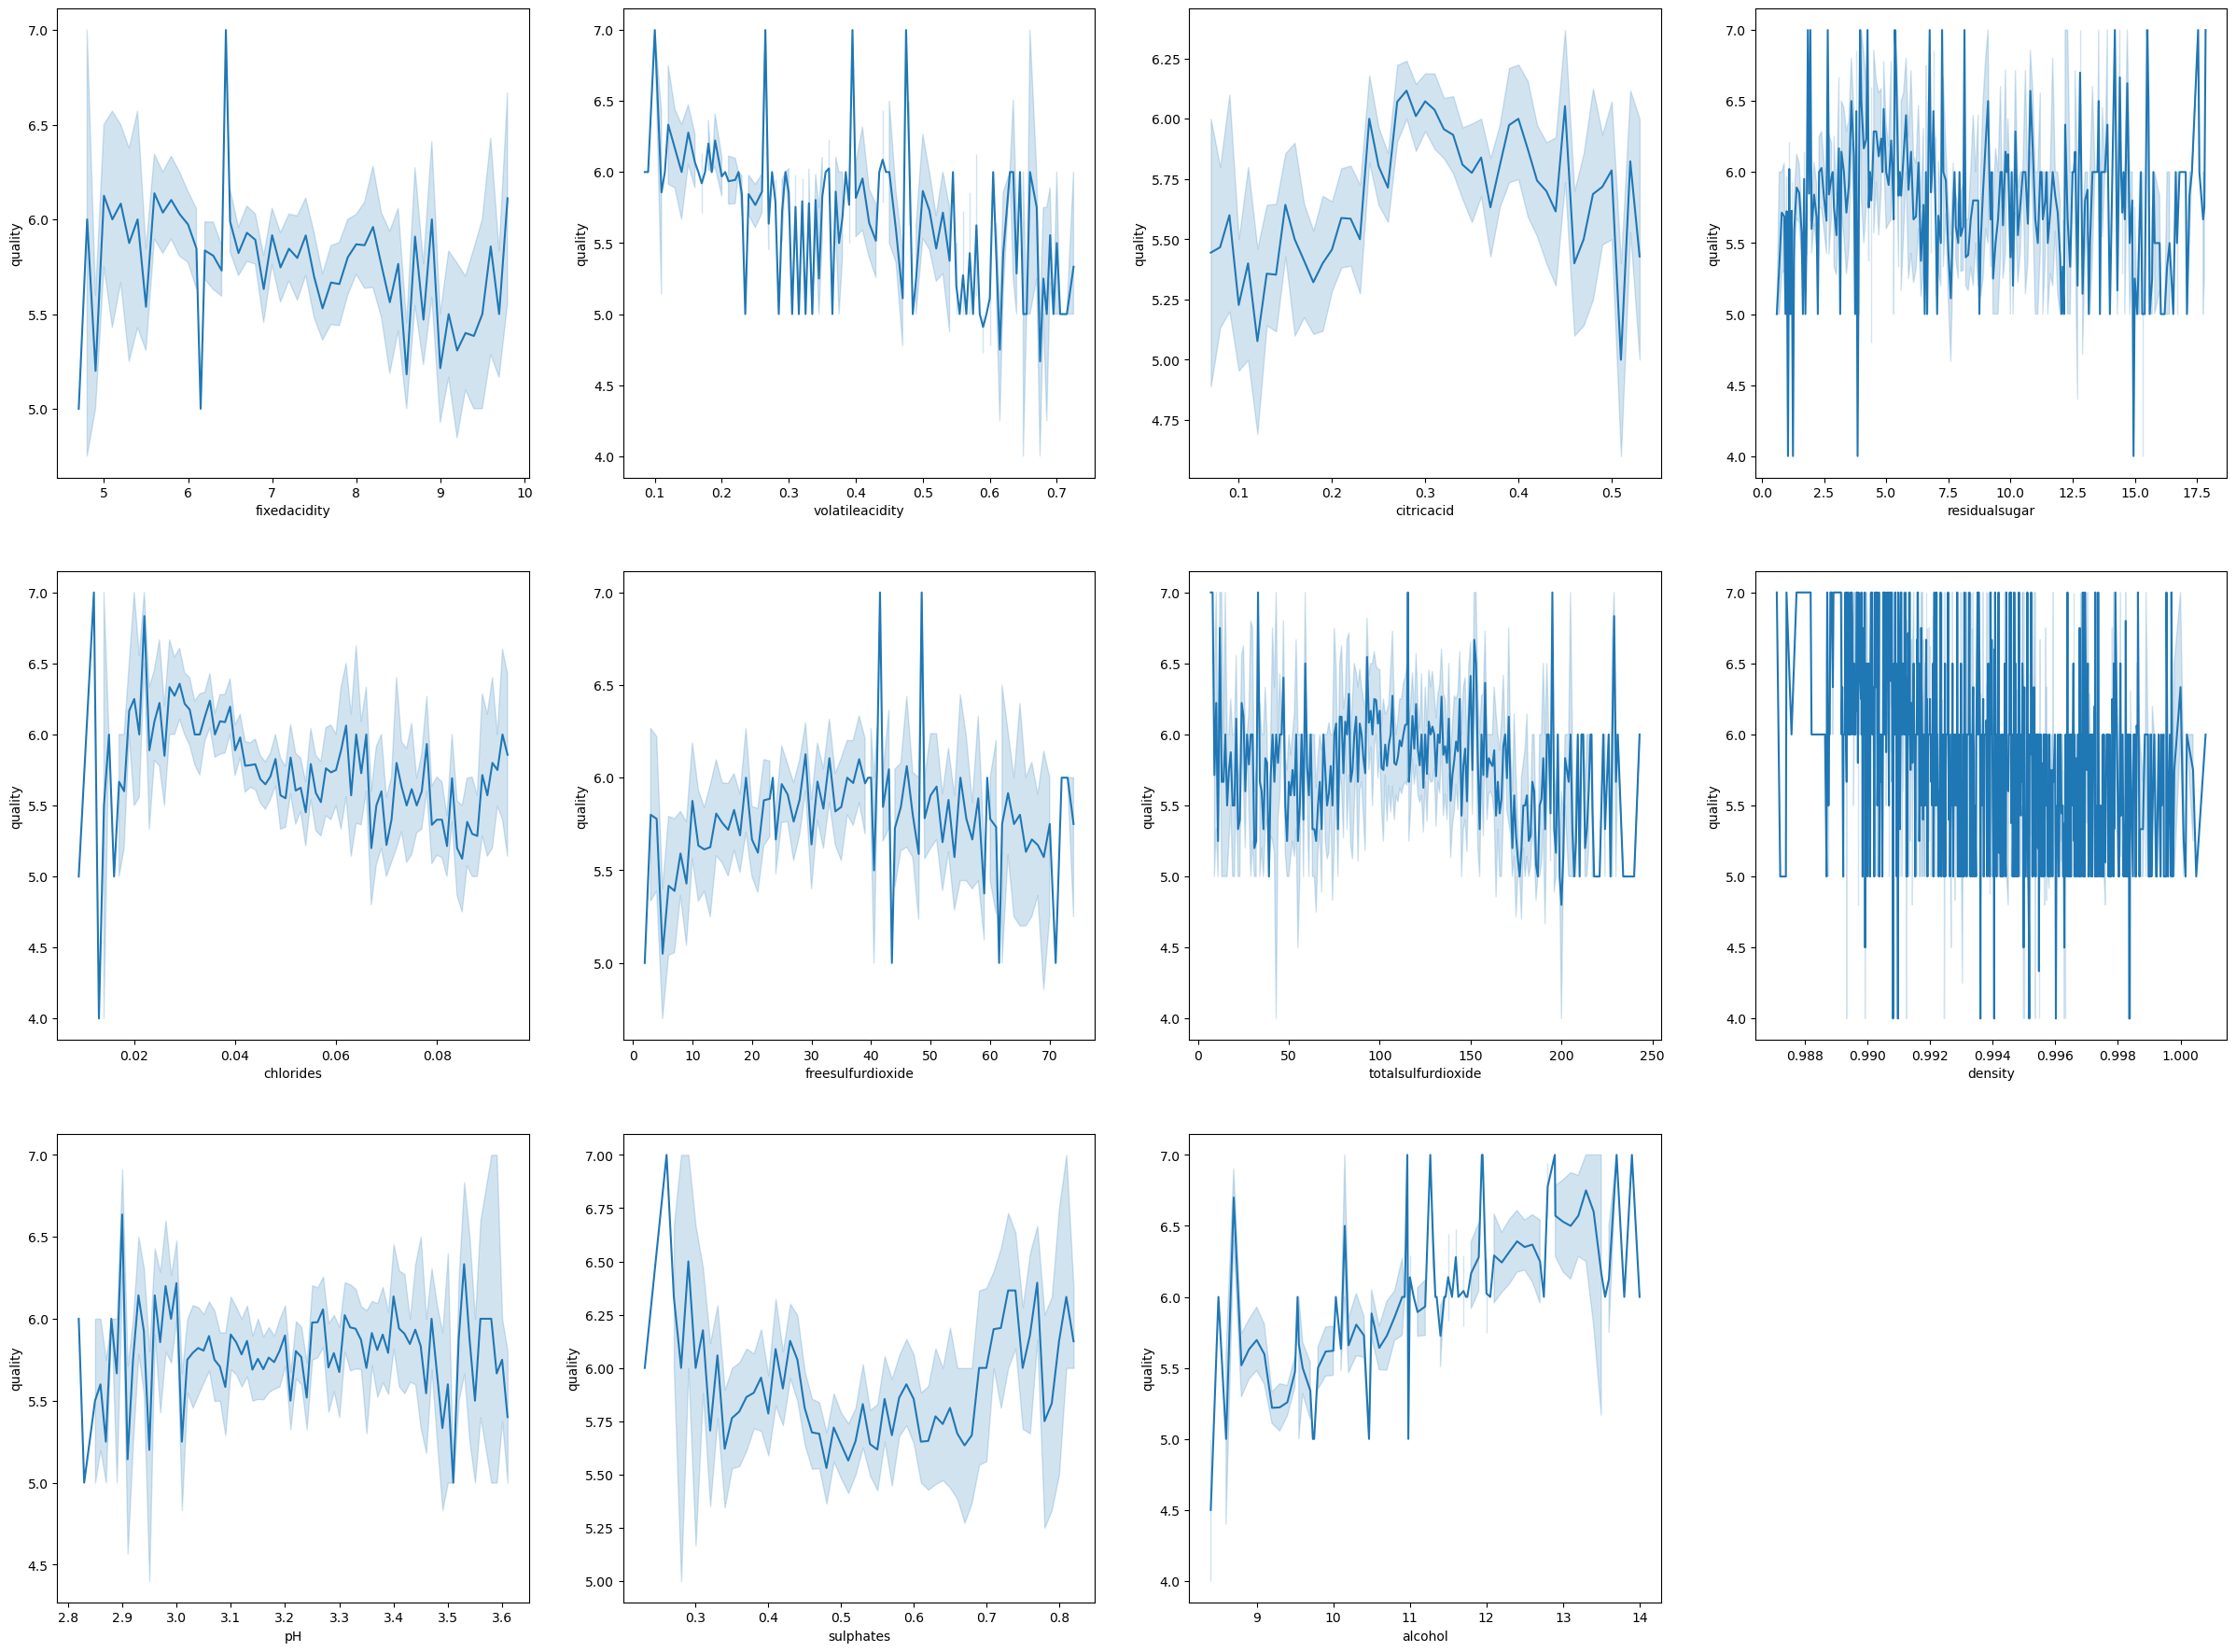

In [11]:
#plot of feature relationships to target
prepare.relations_features(train)

# Does alcohol effect wine quality?

White = 0 Red = 1


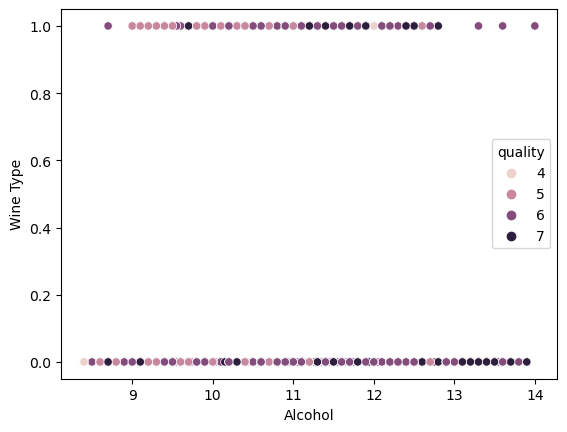

In [12]:
print('White = 0 Red = 1')
sns.scatterplot(x="alcohol", y="is_red", data=train, hue='quality')
plt.xlabel("Alcohol")
plt.ylabel("Wine Type")
plt.show()

# Does density effect wine quality

White = 0 Red = 1


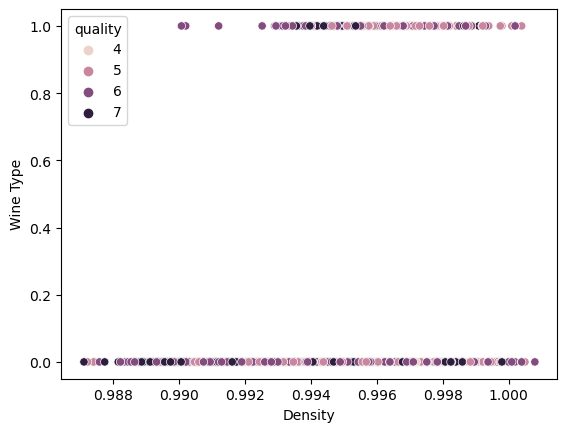

In [13]:
print('White = 0 Red = 1')
sns.scatterplot(x="density", y="is_red", data=train, hue='quality')
plt.xlabel("Density")
plt.ylabel("Wine Type")
plt.show()

# Does chlorides effect wine quality

White = 0 Red = 1


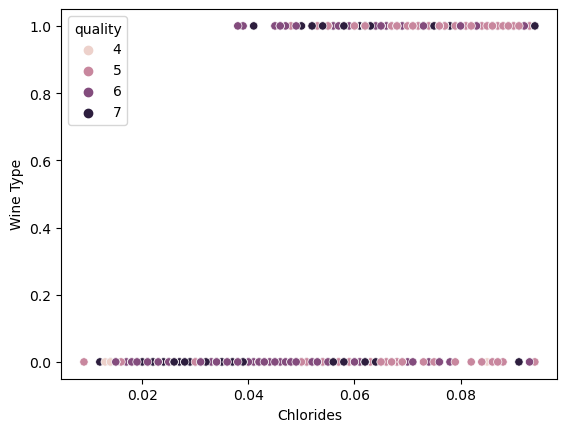

In [14]:
print('White = 0 Red = 1')
sns.scatterplot(x="chlorides", y="is_red", data=train, hue='quality')
plt.xlabel("Chlorides")
plt.ylabel("Wine Type")
plt.show()

# Is there a difference in quality for red or white wine?

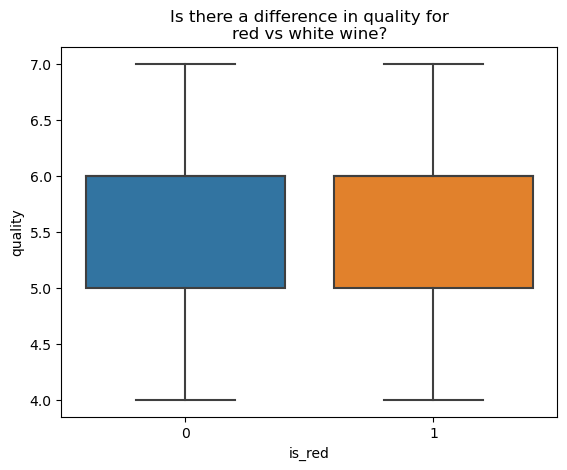

In [15]:
sns.boxplot(x=train.is_red, y=train.quality)
plt.title("Is there a difference in quality for\nred vs white wine?")
plt.show()


**Test the equal variance**
**H0 is that the variances are equal**
* Levene test
* our two groups are 1. where train.is-red==0 and 2) where train.is_red == 1

In [16]:
#Levene test
stats.levene(train[train.is_red==0].quality, 
             train[train.is_red==1].quality)

LeveneResult(statistic=5.615197017103729, pvalue=0.017903701231317275)

In [17]:
#ttest independant
stats.ttest_ind(train[train.is_red==0].quality, 
                train[train.is_red==1].quality, 
                equal_var=True)

Ttest_indResult(statistic=5.2532447633664106, pvalue=1.6602138078343052e-07)

# Does Clustering provide a better insight on the data?
* Performed clustering on multiple target features in modeling. 
* No clear clusters indentified in this dataset
* Sample work in dummy notebook.

# Exploratory Summary
* No significant difference in variances
* Alcohol has the highest positive correlation score related to wine quality indicating higher alcohol levels 
increase wine quality
* Density and Chlorides had similar negative correlations with wine quality indicating lower levels had a posistive affect on quality 
* Clustering features provided no clear insight about the data

# Modeling

* I will use Root Mean Square Erro(RMSE) as my metric of evaluation
* Using the Mean quality score we achieve a RMSE of .76 this will be the baseline for this project
* I will use four different models for evaluation 
* Models will be evaluated on train and validate data first and the best performing model will be evaluated on the test data

# Modeling Features

**fixedacidity**: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

**scaled_volatileacidity**: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste',

**citricacid**: found in small quantities, citric acid can add freshness and flavor to wines

**residualsugar**: the amount of sugar remaining after fermentation stops its rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

**scaled_chlorides**: the amount of salt in the wine','the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

**scaled_freesulfurdioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

**totalsulfurdioxide**: the density of water is close to that of water depending on the percent alcohol and sugar content

**scaled_density**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

**scaled_sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

**scaled_alcohol**: the percent alcohol content of the wine','(score between 0 and 10)

**is_red**: indicated red or white with 1 or 0

In [18]:
#Prep data for modeling
X= partitions[1:4] 
for i in range(len(X)):
    X[i] = prepare.scale_and_concat(X[i], partitions)
    
X_train = X[0].iloc[:,0:27]
X_validate = X[1].iloc[:,0:27]
X_test = X[2].iloc[:,0:27]

In [19]:
#Prep data for modeling
prepare.modeling_feats(X_train,X_validate,X_test)

# Baseline
* Will use Mean as baseline because it's a lower number
* Plotted visual of baseline vs actual quality

In [20]:
#got RMSE using Mean and Median
prepare.baseline(y_train, y_validate)

RMSE using Mean
Train/In-Sample:  0.7513438619598115 
Validate/Out-of-Sample:  0.7655926540479826
RMSE using Median
Train/In-Sample:  0.7733200637231898 
Validate/Out-of-Sample:  0.785474186061959


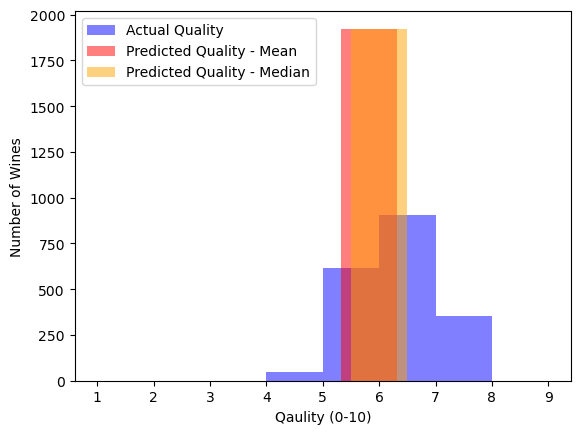

In [21]:
#baseline quality predictions vs actual quality predictions
prepare.actualvs_pred(y_train)

# OLS Model

In [22]:
#OLS Linear Regression Model Results
prepare.lm_model(X_train,y_train,X_validate,y_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.6279474183547606 
Validation/Out-of-Sample:  0.6493878236112419


* OLS Model outperforms baseline

# Lasso Lars

In [23]:
#Lasso Lars Model Results
prepare.lars_model(X_train,y_train,y_validate,X_validate)

RMSE for Lasso + Lars
Training/In-Sample:  0.7513438619598115 
Validation/Out-of-Sample:  0.7655926540479826


* Lasso Lars is about the same as baseline 

# Tweedie Regressor

In [24]:
#Tweedie Regressor
prepare.tweedie_model(X_train,y_train,y_validate,X_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  0.6331915559463505 
Validation/Out-of-Sample:  0.6463876116872742


* Tweedie Regressor beat baseline and was more in line with the OLS model

# Polynomial Model

In [25]:
#Polynomial Model Results
prepare.poly_model(X_train,y_train,y_validate,X_validate,X_test)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.5762495096602211 
Validation/Out-of-Sample:  0.6209732974728


* Polynomial performed better than baseline and all other models. We will use this model on our test data.

# Evaluate

* Plotted model predictions vs actual quality to see where each model performed
* Plotted value changes with error change to see what quality scores gave models the best and worst predictions
* Plotted distributions of the top two models against actual quality for a comparison of error

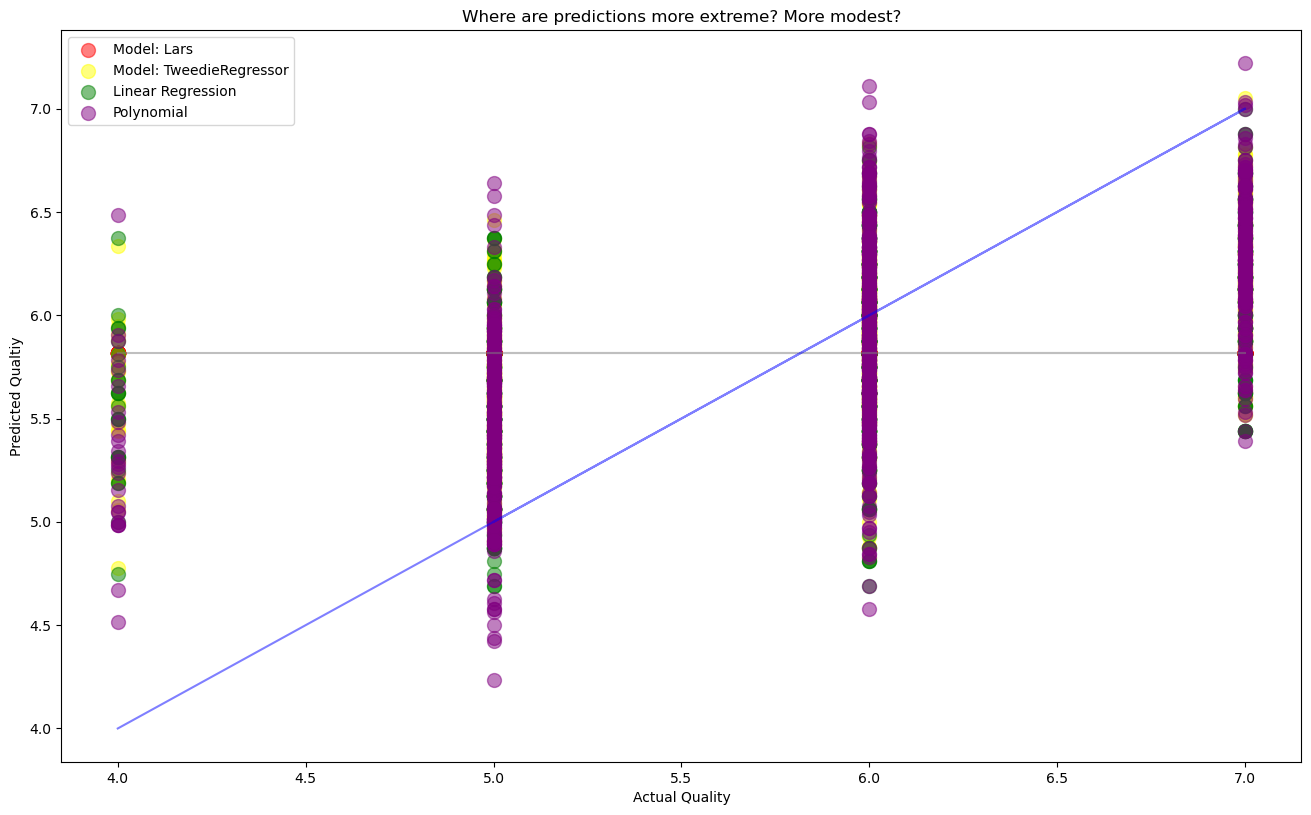

In [26]:
#Model Predictions vs Actual
prepare.plot_model_pred(y_validate)

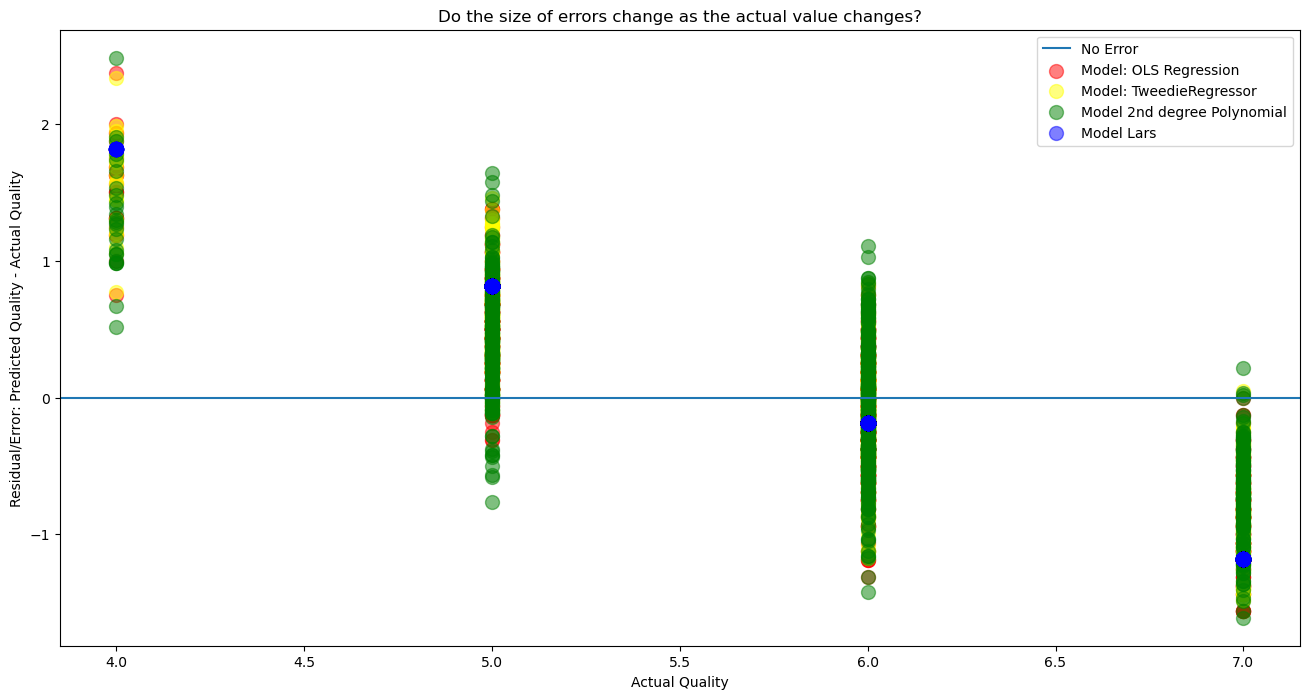

In [27]:
#view how errors change based on actual value change
prepare.plot_errors(y_validate)

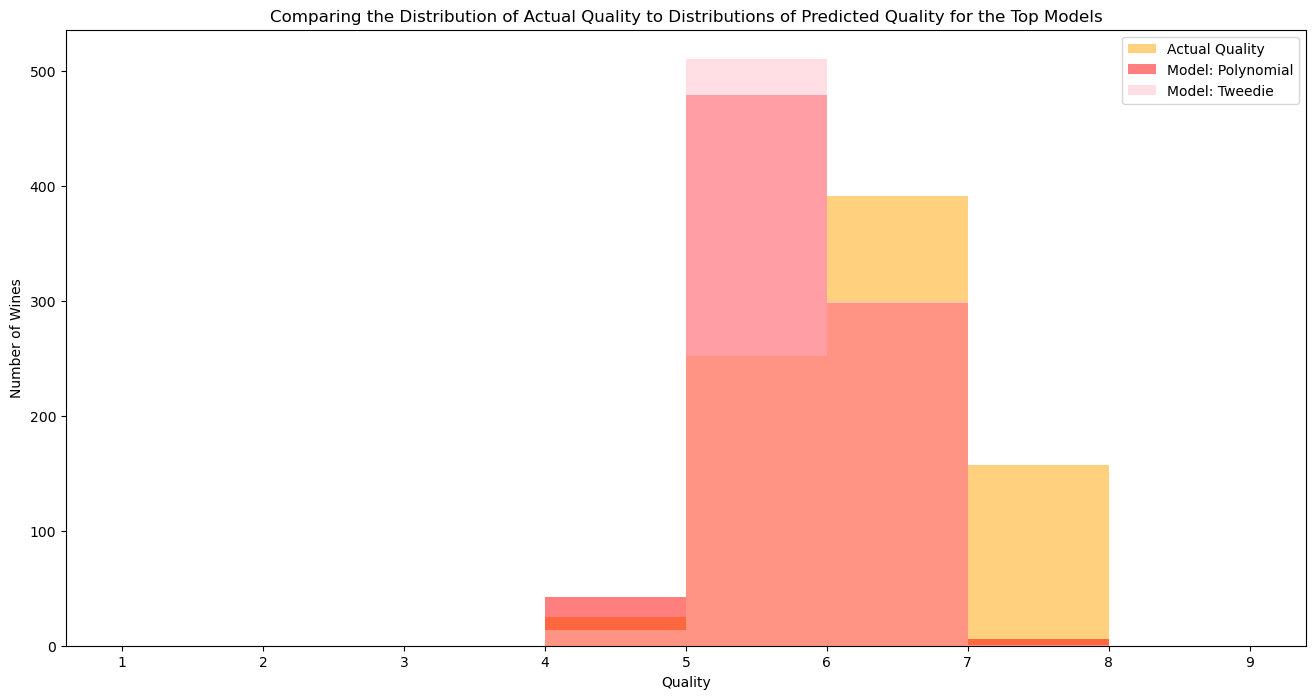

In [28]:
#Plot the top two models vs actual
prepare.top_model(y_validate)

# Polynomial on Test Data

* The Polynomial Model return a .58 RMSE on test data
* Polynomial Model decreased errors by 23.44%

In [29]:
#Evaluate best model on test data
prepare.best_model(X_train,y_test,y_train,X_validate,X_test)

RMSE for OLS Model using Polynomial Regression
Out-of-Sample Performance:  0.5861530611236968


In [30]:
#verify decreased error percentage
prepare.final_model(y_test,y_validate)

Polynomial Model decreased errors by 23.44%


# Conclusion 

* Majority of wine quality scores fell between 5-7 
* All models tested werent very successful predicting quality below 5 or above 7
* No clear clusters were visisble in this dataset, clustering could be helpfull at a later time 
* No clear driver of wine quality, using multiple features proved to be the most successful approach when modeling

# Recommendations 

* Trying more combinations of features to achieve a lower RMSE
* Try different regression algorithms that havent been used on the dataset
* Collecting more data on high quality wines to help improve predictions

# Next Steps
* Research Ridge Regression and SVD to see if either model could be an improvement on what we currently have